# Import Gene Annotation File

https://github.com/hakha-most/gwas_eqtl/blob/master/gene_annotations/genes.protein_coding.v39.gtf

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip

# Local path to GTF file
gtf_file_path = 'genes.protein_coding.v39.gtf'

# Load the GTF file into a pandas DataFrame and use the first row as headers
gtf_df = pd.read_csv(gtf_file_path, sep='\t', header=0)

# Display the first few rows of the dataframe
gtf_df.sort_values('start')
gtf_df.head()

,chr,start,end,strand,GeneSymbol,cons,gene,hgnc_id,tss,tes
0,chr1,65419,71585,+,ENSG00000186092,protein_coding,OR4F5,HGNC:14825,65419,71585
1,chr1,621096,622034,-,ENSG00000284662,protein_coding,OR4F16,HGNC:15079,622034,621096
2,chr1,859303,879955,+,ENSG00000187634,protein_coding,SAMD11,HGNC:28706,859303,879955
3,chr1,879583,894689,-,ENSG00000188976,protein_coding,NOC2L,HGNC:24517,894689,879583
4,chr1,895964,901099,+,ENSG00000187961,protein_coding,KLHL17,HGNC:24023,895964,901099


In [22]:
gtf_df.shape

(18332, 10)

#### convert chr to int

In [23]:
gtf_df['chr'] = gtf_df['chr'].str[3:].astype(int)
gtf_df['start'] = gtf_df['start'].astype(int)

In [24]:
gtf_df.groupby('chr')['start'].agg({'min', 'max'}).reset_index()

,chr,max,min
0,1,249200395,65419
1,2,242836139,38814
2,3,197687071,238446
3,4,190945522,53180
4,5,180794269,92283
5,6,170884383,291630
6,7,158820866,330136
7,8,146277851,116086
8,9,140772234,14475
9,10,135437399,92828


Positions reset for each chromosome

### File Description

This file contains **gene annotations** for **protein-coding genes** and provides information about the **location of genes on the genome**. Below is a description of each column:

1. **chr**: The chromosome where the gene is located (e.g., `chr1`, `chr2`, etc.).
2. **start**: The start position of the gene on the chromosome (in base pairs).
3. **end**: The end position of the gene on the chromosome (in base pairs).
4. **strand**: Indicates the strand on which the gene is located (`+` for forward strand, `-` for reverse strand).
5. **GeneSymbol**: The symbol or name of the gene (e.g., `OR4F5`, `SAMD11`), typically assigned by organizations like HGNC (HUGO Gene Nomenclature Committee).
6. **cons**: This column indicates the type of gene. In this file, all genes are classified as **protein_coding**.
7. **gene**: The Ensembl gene ID, a unique identifier for the gene (e.g., `ENSG00000186092`).
8. **hgnc_id**: The unique identifier for the gene assigned by the **HGNC** (HUGO Gene Nomenclature Committee).
9. **tss**: The **transcription start site**, the position where transcription of the gene starts on the chromosome.
10. **tes**: The **transcription end site**, the position where transcription of the gene ends on the chromosome.

# Import GWAS data

 https://docs.google.com/spreadsheets/d/1kvPoupSzsSFBNSztMzl04xMoSC3Kcx3CrjVf4yBmESU/edit?gid=178908679#gid=178908679 (row 7217)
 
 50_irnt.gwas.imputed_v3.both_sexes.tsv.bgz' 

In [25]:
# Path to GWAS file
gwas_file_path = '50_irnt.gwas.imputed_v3.both_sexes.tsv.bgz'

# Open and read the compressed .bgz file using gzip
with gzip.open(gwas_file_path, 'rt') as f:
    # Load the file into a pandas DataFrame
    gwas_df = pd.read_csv(f, sep='\t')

In [26]:
# Display the first few rows to inspect the structure of the GWAS file
gwas_df

,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval
0,1:15791:C:T,T,5.440760e-09,True,360388,0.003922,0.003474,18.049900,178.468000,0.101138,0.919441
1,1:69487:G:A,A,5.761760e-06,True,360388,4.152940,-0.087536,-0.041345,0.349577,-0.118272,0.905852
2,1:69569:T:C,C,1.881580e-04,True,360388,135.620000,-2.079970,-0.046994,0.062695,-0.749571,0.453514
3,1:139853:C:T,T,5.674710e-06,True,360388,4.090200,-0.105659,-0.042056,0.349588,-0.120302,0.904244
4,1:692794:CA:C,C,1.106010e-01,False,360388,79718.500000,101.503000,0.000797,0.002899,0.274788,0.783479
...,...,...,...,...,...,...,...,...,...,...,...
13791462,X:154929412:C:T,T,2.454380e-01,False,360388,176906.000000,-787.373000,-0.001657,0.001588,-1.044020,0.296477
13791463,X:154929637:CT:C,C,2.297000e-01,False,360388,165562.000000,-734.113000,-0.001654,0.001657,-0.998454,0.318060
13791464,X:154929952:CAA:C,C,2.393990e-01,False,360388,172553.000000,-480.000000,-0.001689,0.001670,-1.011490,0.311783
13791465,X:154930230:A:G,G,2.458510e-01,False,360388,177204.000000,-706.111000,-0.001520,0.001587,-0.957369,0.338381


### GWAS Summary Statistics Dataset Description

1. **variant**: The unique identifier for each SNP (Single Nucleotide Polymorphism). This can include information like chromosome, position, reference allele, and alternative allele (e.g., `1:12345:A:G`).
   - **Example**: `1:10583:T:G`

2. **minor_allele**: The allele that is less frequent in the population (minor allele) for this particular SNP.
   - **Example**: `G`

3. **minor_AF**: The **minor allele frequency** (AF), which represents the frequency of the minor allele in the population. It ranges from 0 to 1.
   - **Example**: `0.35` (35% of individuals carry the minor allele)

4. **low_confidence_variant**: A flag indicating whether the variant has **low confidence** due to imputation quality or other uncertainties. Values may be `TRUE` or `FALSE`.
   - **Example**: `FALSE`

5. **n_complete_samples**: The number of samples for which complete genotype data is available for this variant.
   - **Example**: `300,000`

6. **AC**: The **allele count** of the minor allele, i.e., the number of times the minor allele appears in the study population (across all samples).
   - **Example**: `50000`

7. **ytx**: Likely a placeholder for a phenotype-related statistic; depending on the dataset, this could represent something like the trait mean or effect size (its exact meaning depends on the specific analysis).

8. **beta**: The **effect size** of the SNP on the trait being studied (in this case, likely height). It represents the change in the trait per additional copy of the minor allele.
   - **Example**: `0.05` (the trait increases by 0.05 units for each additional copy of the minor allele)

9. **se**: The **standard error** of the effect size (beta), indicating the precision of the estimated effect.
   - **Example**: `0.01`

10. **tstat**: The **t-statistic** for the beta estimate, which is the ratio of the beta estimate to its standard error.
    - **Example**: `5.0` (higher values indicate more significant associations)

11. **pval**: The **p-value** of the association between the SNP and the trait. This indicates the significance of the result, with smaller p-values suggesting stronger evidence that the SNP is associated with the trait.
    - **Example**: `1.2e-6` (a very small p-value, indicating strong evidence of association)

In [27]:
gwas_df.shape

(13791467, 11)

# Find Variant Chromosome and Position

In [28]:
gwas_df[['chr', 'pos', 'ref', 'alt']] = gwas_df['variant'].str.split(':', expand=True)
gwas_df.head(1)

,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval,chr,pos,ref,alt
0,1:15791:C:T,T,5.440760e-09,True,360388,0.003922,0.003474,18.0499,178.468,0.101138,0.919441,1,15791,C,T


In [29]:
gwas_df = gwas_df.loc[gwas_df['chr'] != 'X']
gwas_df['chr'] = gwas_df['chr'].astype(int)
gwas_df['pos'] = gwas_df['pos'].astype(int)

/var/folders/z0/1hhlpnfn2mz3vk7t57zdcy0w0000gn/T/ipykernel_12952/2494202816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_df['chr'] = gwas_df['chr'].astype(int)
/var/folders/z0/1hhlpnfn2mz3vk7t57zdcy0w0000gn/T/ipykernel_12952/2494202816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwas_df['pos'] = gwas_df['pos'].astype(int)


In [30]:
gwas_df.groupby('chr')['pos'].agg({'min','max'}).reset_index()

,chr,max,min
0,1,249230914,15791
1,2,243082521,10181
2,3,197900375,60197
3,4,190922257,13012
4,5,180736061,11882
5,6,170934414,202076
6,7,159128550,27916
7,8,146303560,34440
8,9,141104957,40997
9,10,135503523,61334


It appears that position resets on each chromosome 

# Join to Find 5 Nearest Genes 

In [31]:
def repeated_forward_merge(gwas_df, gtf_df, num_merges=3):
    # Initial sorting of key columns for the first merge
    gwas_sorted = gwas_df[['variant', 'pval', 'chr', 'pos']].sort_values('pos')
    gtf_sorted = gtf_df[['chr', 'start', 'GeneSymbol', 'gene']].sort_values('start')

    # Ensure both 'start' columns are of the same type (convert to float to handle NaNs)
    gtf_sorted['start'] = gtf_sorted['start'].astype(float)
    gwas_sorted['pos'] = gwas_sorted['pos'].astype(float)

    # First merge_asof
    merged_df = pd.merge_asof(
        gwas_sorted, 
        gtf_sorted, 
        by='chr', 
        left_on='pos', 
        right_on='start', 
        direction='forward',
        suffixes=('', '_f1')  # First set of suffixes
    )

    # Replace NaN values in 'start' column and rename for subsequent merges
    merged_df['start'] = merged_df['start'].fillna(np.inf)
    merged_df = merged_df.rename(columns={'start': 'start_f1', 'GeneSymbol': 'GeneSymbol_f1', 'gene': 'gene_f1'})
    merged_df = merged_df.sort_values('start_f1')

    # Iterative forward merges
    for i in range(2, num_merges + 1):
        # Ensure both columns are of the same type
        merged_df[f'start_f{i-1}'] = merged_df[f'start_f{i-1}'].astype(float)
        gtf_sorted['start'] = gtf_sorted['start'].astype(float)

        # Perform the next forward merge
        merged_df = pd.merge_asof(
            merged_df, 
            gtf_sorted, 
            by='chr', 
            left_on=f'start_f{i-1}', 
            right_on='start', 
            direction='forward',
            allow_exact_matches=False,
            suffixes=(f'_f{i-1}', f'_f{i}')
        )

        # Replace NaN values in the new 'start' column and rename for next iteration
        merged_df['start'] = merged_df['start'].fillna(np.inf)
        merged_df = merged_df.rename(columns={
            'start': f'start_f{i}', 
            'GeneSymbol': f'GeneSymbol_f{i}', 
            'gene': f'gene_f{i}'
        })
        merged_df = merged_df.sort_values(f'start_f{i}')

    # After the last merge, replace all np.inf values back to NaN
    for i in range(1, num_merges + 1):
        merged_df[f'start_f{i}'] = merged_df[f'start_f{i}'].replace(np.inf, np.nan)
    
    return merged_df

f_final = repeated_forward_merge(gwas_df, gtf_df, num_merges=3)

In [32]:
f_final

,variant,pval,chr,pos,start_f1,GeneSymbol_f1,gene_f1,start_f2,GeneSymbol_f2,gene_f2,start_f3,GeneSymbol_f3,gene_f3
80,16:94919:G:A,0.557584,16,94919.0,96407.0,ENSG00000161980,POLR3K,103828.0,ENSG00000161981,SNRNP25,108058.0,ENSG00000007384,RHBDF1
89,16:92548:T:C,0.270949,16,92548.0,96407.0,ENSG00000161980,POLR3K,103828.0,ENSG00000161981,SNRNP25,108058.0,ENSG00000007384,RHBDF1
88,16:83807:G:C,0.967137,16,83807.0,96407.0,ENSG00000161980,POLR3K,103828.0,ENSG00000161981,SNRNP25,108058.0,ENSG00000007384,RHBDF1
87,16:94585:AGATCAGGAGGCT:A,0.641873,16,94585.0,96407.0,ENSG00000161980,POLR3K,103828.0,ENSG00000161981,SNRNP25,108058.0,ENSG00000007384,RHBDF1
86,16:83887:C:A,0.955567,16,83887.0,96407.0,ENSG00000161980,POLR3K,103828.0,ENSG00000161981,SNRNP25,108058.0,ENSG00000007384,RHBDF1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071184,11:134188790:T:A,0.351058,11,134188790.0,134201768.0,ENSG00000149328,GLB1L2,134248398.0,ENSG00000109956,B3GAT1,NaN,NaN,NaN
11071183,11:134188542:T:C,0.497575,11,134188542.0,134201768.0,ENSG00000149328,GLB1L2,134248398.0,ENSG00000109956,B3GAT1,NaN,NaN,NaN
11071182,11:134186882:G:A,0.470821,11,134186882.0,134201768.0,ENSG00000149328,GLB1L2,134248398.0,ENSG00000109956,B3GAT1,NaN,NaN,NaN
11071189,11:134161970:C:CT,0.243567,11,134161970.0,134201768.0,ENSG00000149328,GLB1L2,134248398.0,ENSG00000109956,B3GAT1,NaN,NaN,NaN


In [33]:
# Adjusted function to ensure all negative infinity values are replaced with NaN in the final result
def repeated_backward_merge_with_nan(gwas_df, gtf_df, num_merges=3):
    # Initial sorting of key columns for the first merge
    gwas_sorted = gwas_df.sort_values('pos')
    gtf_sorted = gtf_df[['chr', 'start', 'GeneSymbol', 'gene']].sort_values('start')

    # Ensure both 'start' columns are of the same type (convert to float to handle NaNs)
    gtf_sorted['start'] = gtf_sorted['start'].astype(float)
    gwas_sorted['pos'] = gwas_sorted['pos'].astype(float)

    # First backward merge_asof
    merged_df = pd.merge_asof(
        gwas_sorted, 
        gtf_sorted, 
        by='chr', 
        left_on='pos', 
        right_on='start', 
        direction='backward',
        suffixes=('', '_b1')  # First set of suffixes
    )

    # Replace NaN values in 'start' column and rename for subsequent merges
    merged_df['start'] = merged_df['start'].fillna(-np.inf)
    merged_df = merged_df.rename(columns={'start': 'start_b1', 'GeneSymbol': 'GeneSymbol_b1', 'gene': 'gene_b1'})
    merged_df = merged_df.sort_values('start_b1')

    # Iterative backward merges
    for i in range(2, num_merges + 1):
        # Ensure both columns are of the same type
        merged_df[f'start_b{i-1}'] = merged_df[f'start_b{i-1}'].astype(float)
        gtf_sorted['start'] = gtf_sorted['start'].astype(float)

        # Perform the next backward merge
        merged_df = pd.merge_asof(
            merged_df, 
            gtf_sorted, 
            by='chr', 
            left_on=f'start_b{i-1}', 
            right_on='start', 
            direction='backward',
            allow_exact_matches=False,
            suffixes=(f'_b{i-1}', f'_b{i}')
        )

        # Replace NaN values in the new 'start' column and rename for next iteration
        merged_df['start'] = merged_df['start'].fillna(-np.inf)
        merged_df = merged_df.rename(columns={
            'start': f'start_b{i}', 
            'GeneSymbol': f'GeneSymbol_b{i}', 
            'gene': f'gene_b{i}'
        })
        merged_df = merged_df.sort_values(f'start_b{i}')

    # After the last merge, replace all -np.inf values back to NaN
    for i in range(1, num_merges + 1):
        merged_df[f'start_b{i}'] = merged_df[f'start_b{i}'].replace(-np.inf, np.nan)
    
    return merged_df

# Example usage:
f_b_final = repeated_backward_merge_with_nan(f_final, gtf_df, num_merges=3)

In [34]:
f_b_final

,variant,pval,chr,pos,start_f1,GeneSymbol_f1,gene_f1,start_f2,GeneSymbol_f2,gene_f2,start_f3,GeneSymbol_f3,gene_f3,start_b1,GeneSymbol_b1,gene_b1,start_b2,GeneSymbol_b2,gene_b2,start_b3,GeneSymbol_b3,gene_b3
0,17:302:T:TA,0.281579,17,302.0,5810.0,ENSG00000272636,DOC2B,62180.0,ENSG00000181031,RPH3AL,260116.0,ENSG00000187624,C17orf97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27189,16:105325:G:A,0.168984,16,105325.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN
27190,16:105444:C:T,0.162921,16,105444.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN
27191,16:105752:C:T,0.763118,16,105752.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN
27192,16:107211:G:A,0.161126,16,107211.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364242,1:249205823:G:A,0.918853,1,249205823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672
13364241,1:249205806:T:C,0.989577,1,249205806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672
13364240,1:249205774:T:C,0.767464,1,249205774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672
13364248,1:249206890:T:A,0.597062,1,249206890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672


In [35]:
# Function to calculate differences between pos and all forward and backward start columns
def calculate_differences(df, num_merges=3):
    # Calculate the difference between pos and start_f1, start_f2, ..., start_fx for forward merges
    for i in range(1, num_merges + 1):
        df[f'diff_f{i}'] = df[f'start_f{i}'] - df['pos']
    
    # Calculate the difference between pos and start_b1, start_b2, ..., start_bx for backward merges
    for i in range(1, num_merges + 1):
        df[f'diff_b{i}'] = df[f'start_b{i}'] - df['pos']
    
    return df

f_b_final_with_differences = calculate_differences(f_b_final, num_merges=3)

In [36]:
f_b_final_with_differences

,variant,pval,chr,pos,start_f1,GeneSymbol_f1,gene_f1,start_f2,GeneSymbol_f2,gene_f2,start_f3,GeneSymbol_f3,gene_f3,start_b1,GeneSymbol_b1,gene_b1,start_b2,GeneSymbol_b2,gene_b2,start_b3,GeneSymbol_b3,gene_b3,diff_f1,diff_f2,diff_f3,diff_b1,diff_b2,diff_b3
0,17:302:T:TA,0.281579,17,302.0,5810.0,ENSG00000272636,DOC2B,62180.0,ENSG00000181031,RPH3AL,260116.0,ENSG00000187624,C17orf97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5508.0,61878.0,259814.0,NaN,NaN,NaN
27189,16:105325:G:A,0.168984,16,105325.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2733.0,21681.0,28945.0,-1497.0,-8918.0,NaN
27190,16:105444:C:T,0.162921,16,105444.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2614.0,21562.0,28826.0,-1616.0,-9037.0,NaN
27191,16:105752:C:T,0.763118,16,105752.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2306.0,21254.0,28518.0,-1924.0,-9345.0,NaN
27192,16:107211:G:A,0.161126,16,107211.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,847.0,19795.0,27059.0,-3383.0,-10804.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364242,1:249205823:G:A,0.918853,1,249205823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,-5428.0,-61618.0,-73414.0
13364241,1:249205806:T:C,0.989577,1,249205806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,-5411.0,-61601.0,-73397.0
13364240,1:249205774:T:C,0.767464,1,249205774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,-5379.0,-61569.0,-73365.0
13364248,1:249206890:T:A,0.597062,1,249206890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,-6495.0,-62685.0,-74481.0


In [37]:
f_b_final_with_differences[['diff_f1', 'diff_f2', 'diff_f3', 'diff_b1', 'diff_b2', 'diff_b3']].mean()

diff_f1    4.507356e+05
diff_f2    8.421126e+05
diff_f3    1.120898e+06
diff_b1   -4.557157e+05
diff_b2   -8.418453e+05
diff_b3   -1.118083e+06
dtype: float64

## Validation of above results: Implementing a lambda function to compute the 5 nearest neighboring genes for each mutation. Developing this solution to cross check the entries from the merge_asof method above

In [38]:
from pandarallel import pandarallel
#grab a small sample of the gwas dataframe containing mutation information 
gwas_df.head()
gtf_df.head()
gwas_sample = gwas_df.iloc[np.random.choice(range(len(gwas_df)),size=1000000,replace=False)] 

#write a function to find the 5 nearest genes by absolute difference in mutation position and gene start position
def nearest_gene_finder(m):
    dists = np.abs(gtf_df.loc[gtf_df.chr == m["chr"],"start"]-m["pos"])
    dists_sort_arg = np.argsort(dists)
    data = {}
    for i in range(5):
        key_gene_ind = "f%s_ind"%(i+1)
        gene_ind = dists.index[dists_sort_arg.iloc[i]]
        
        key_gene_dist = "f%s_dist"%(i+1) 
        gene_dist = dists.iloc[dists_sort_arg.iloc[i]]
    
        data[key_gene_ind] = gene_ind
        data[key_gene_dist] = gene_dist
    return(pd.Series(data))
#apply the function over each row of the sample mutation df 
#mutn_5_nearest_genes_sample = gwas_sample.apply(lambda m: nearest_gene_finder(m),axis=1)
pandarallel.initialize(progress_bar=False)
mutn_5_nearest_genes_sample = gwas_sample.parallel_apply(lambda m: nearest_gene_finder(m),axis=1)

#now join the relevant metadata we want on each mutation and gene including 
gwas_df_metadata = gwas_df[["variant","pval","chr","pos"]].add_suffix(".mut")
gtf_df_metadata = gtf_df[["chr","start","GeneSymbol","gene"]]

#join mutation metadata onto df 
mutn_5_nearest_genes_sample_md = mutn_5_nearest_genes_sample.join(gwas_df_metadata)

#loop through each of the 5 nearest gene columns and get the gene's metadata
nearest_genes_sample_df = mutn_5_nearest_genes_sample_md
for i in range(1,6):
    nearest_genes_sample_df = nearest_genes_sample_df.merge(gtf_df_metadata.add_suffix(".f%s"%(i)),left_on = "f%s_ind"%(i),right_index=True)
nearest_genes_sample_df

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


,f1_ind,f1_dist,f2_ind,f2_dist,f3_ind,f3_dist,f4_ind,f4_dist,f5_ind,f5_dist,variant.mut,pval.mut,chr.mut,pos.mut,chr.f1,start.f1,GeneSymbol.f1,gene.f1,chr.f2,start.f2,GeneSymbol.f2,gene.f2,chr.f3,start.f3,GeneSymbol.f3,gene.f3,chr.f4,start.f4,GeneSymbol.f4,gene.f4,chr.f5,start.f5,GeneSymbol.f5,gene.f5
8771636,10130,35730,10129,105687,10128,317723,10127,341596,10126,549126,11:20726827:T:A,0.590829,11,20726827,11,20691097,ENSG00000165973,NELL1,11,20621140,ENSG00000165970,SLC6A5,11,20409104,ENSG00000185238,PRMT3,11,20385231,ENSG00000109854,HTATIP2,11,20177701,ENSG00000109851,DBX1
2032829,2955,363748,2954,648446,2956,762917,2957,1077509,2958,1283405,2:214512861:C:T,0.639912,2,214512861,2,214149113,ENSG00000144451,SPAG16,2,213864415,ENSG00000030419,IKZF2,2,215275778,ENSG00000174453,VWC2L,2,215590370,ENSG00000138376,BARD1,2,215796266,ENSG00000144452,ABCA12
6679044,7733,348086,7732,1147800,7731,1219118,7730,1368869,7729,1437017,8:3140961:G:A,0.217669,8,3140961,8,2792875,ENSG00000183117,CSMD1,8,1993161,ENSG00000036448,MYOM2,8,1921843,ENSG00000176595,KBTBD11,8,1772092,ENSG00000104728,ARHGEF10,8,1703944,ENSG00000182372,CLN8
3831618,4790,234881,4791,880060,4792,1731744,4793,1744075,4794,1982128,4:138205191:T:G,0.842704,4,138205191,4,138440072,ENSG00000189184,PCDH18,4,139085251,ENSG00000151012,SLC7A11,4,139936935,ENSG00000151014,NOCT,4,139949266,ENSG00000109381,ELF2,4,140187319,ENSG00000137463,MGARP
8511465,9682,294992,9681,1637381,9680,1924838,9679,1968973,9678,2009798,10:108038429:T:C,0.154136,10,108038429,10,108333421,ENSG00000108018,SORCS1,10,106401048,ENSG00000156395,SORCS3,10,106113591,ENSG00000120051,CFAP58,10,106069456,ENSG00000148841,ITPRIP,10,106028631,ENSG00000065621,GSTO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724516,1562,5574,1561,106061,1563,249226,1564,321801,1565,360780,1:184765432:G:A,0.127339,1,184765432,1,184759858,ENSG00000135842,NIBAN1,1,184659371,ENSG00000116406,EDEM3,1,185014658,ENSG00000121481,RNF2,1,185087233,ENSG00000121486,TRMT1L,1,185126212,ENSG00000116668,SWT1
10035095,12165,111357,12166,122744,12167,208381,12168,240075,12164,345629,13:32766479:C:CGGCTGGAGTGCAGT,0.847098,13,32766479,13,32877836,ENSG00000189167,ZAR1L,13,32889223,ENSG00000139618,BRCA2,13,32974860,ENSG00000139597,N4BP2L1,13,33006554,ENSG00000244754,N4BP2L2,13,32420850,ENSG00000073910,FRY
4250607,5049,152668,5048,2546165,5047,3589679,5050,4160419,5051,4367227,5:27033374:T:A,0.485267,5,27033374,5,26880706,ENSG00000113100,CDH9,5,24487209,ENSG00000040731,CDH10,5,23443695,ENSG00000164256,PRDM9,5,31193793,ENSG00000113361,CDH6,5,31400601,ENSG00000113360,DROSHA
5425076,6463,35583,6462,181921,6464,247902,6465,336975,6466,439735,6:80376629:C:T,0.884041,6,80376629,6,80341046,ENSG00000198478,SH3BGRL2,6,80194708,ENSG00000135338,LCA5,6,80624531,ENSG00000118402,ELOVL4,6,80713604,ENSG00000112742,TTK,6,80816364,ENSG00000083123,BCKDHB


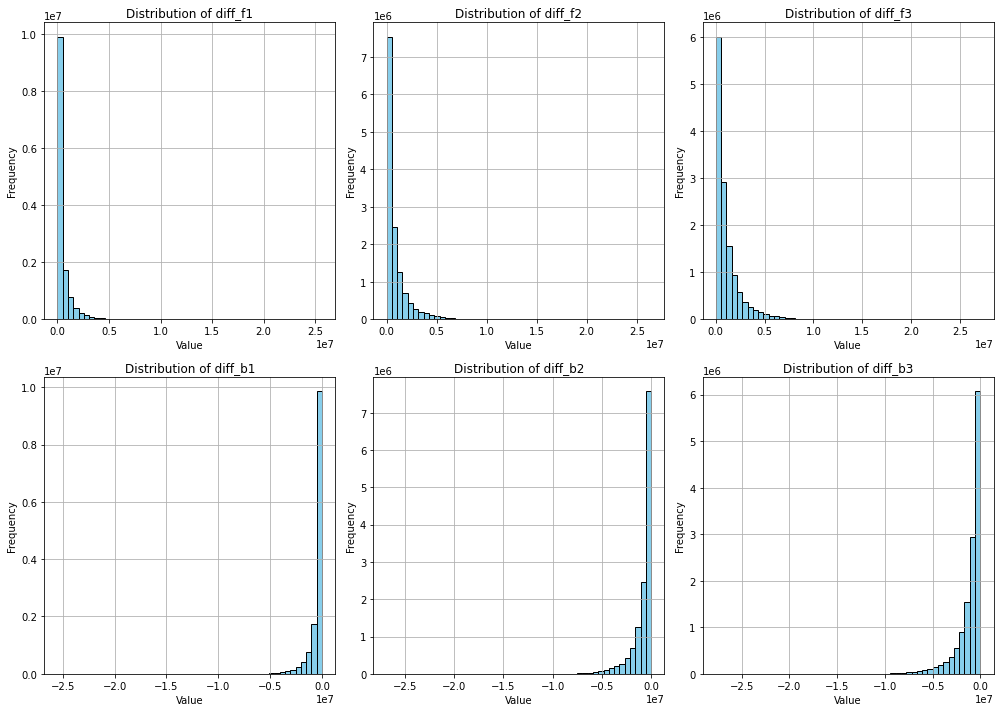

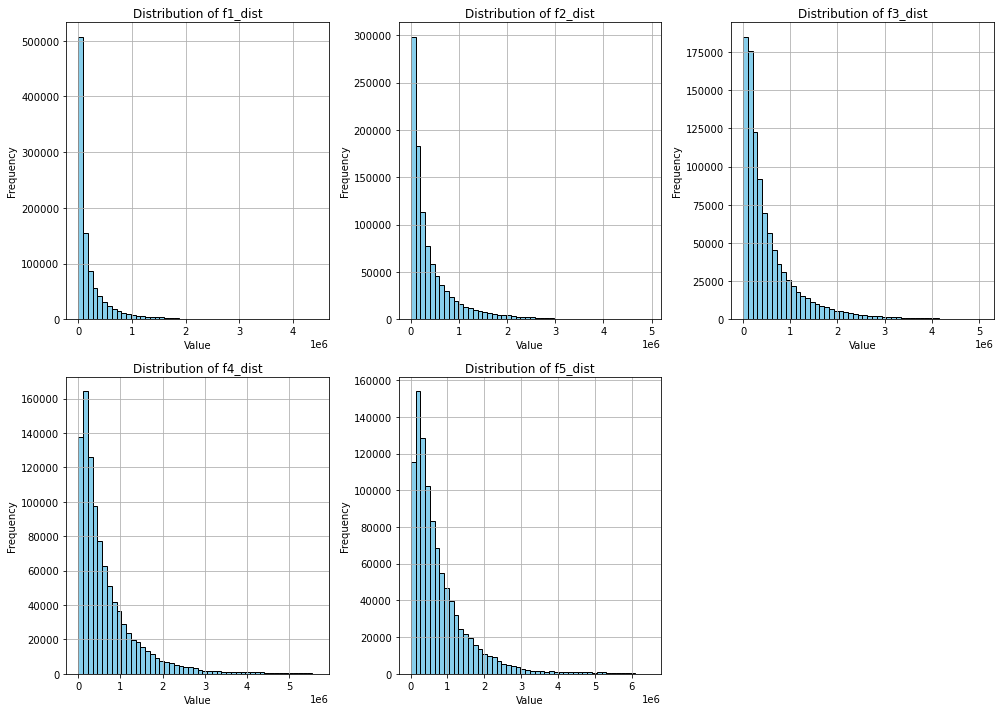

In [39]:
# Plot histograms for each difference column
def plot_histograms(df, columns):
    plt.figure(figsize=(14, 10))
    
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)  # Create a subplot for each column
        df[col].hist(bins=50, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Define the columns to plot
columns_to_plot = ['diff_f1', 'diff_f2', 'diff_f3', 'diff_b1', 'diff_b2', 'diff_b3']
# Call the function to plot histograms
plot_histograms(f_b_final_with_differences, columns_to_plot)

columns_to_plot = ["f1_dist","f2_dist","f3_dist","f4_dist","f5_dist"]
plot_histograms(nearest_genes_sample_df, columns_to_plot)

In [ ]:
s_het_info = pd.read_excel('s_het_info.xlsx',sheet_name=1)

In [40]:
# Function to perform the merge for all forward and backward GeneSymbols and rename the 'post_mean' columns
def merge_s_het_info_with_all(f_b_final_with_differences, s_het_info, num_merges=3):
    # Rename 'ensg' column in s_het_info to match the GeneSymbol columns in f_b_final_with_differences
    s_het_info = s_het_info.rename(columns={'ensg': 'GeneSymbol'})

    # Iterate over both forward and backward gene symbols
    for i in range(1, num_merges + 1):
        # Forward merge for each GeneSymbol_f
        f_b_final_with_differences = pd.merge(
            f_b_final_with_differences, 
            s_het_info[['GeneSymbol', 'post_mean']], 
            left_on=f'GeneSymbol_f{i}', 
            right_on='GeneSymbol', 
            how='left',
            suffixes=('', f'_f{i}')
        )
        
        # Rename the post_mean column to indicate the forward direction
        f_b_final_with_differences = f_b_final_with_differences.rename(
            columns={'post_mean': f's_het_post_f{i}'}
        )
        
        # Drop the duplicated 'GeneSymbol' column created during the merge
        f_b_final_with_differences = f_b_final_with_differences.drop(columns='GeneSymbol', errors='ignore')

        # Backward merge for each GeneSymbol_b
        f_b_final_with_differences = pd.merge(
            f_b_final_with_differences, 
            s_het_info[['GeneSymbol', 'post_mean']], 
            left_on=f'GeneSymbol_b{i}', 
            right_on='GeneSymbol', 
            how='left',
            suffixes=('', f'_b{i}')
        )
        
        # Rename the post_mean column to indicate the backward direction
        f_b_final_with_differences = f_b_final_with_differences.rename(
            columns={'post_mean': f's_het_post_b{i}'}
        )
        
        # Drop the duplicated 'GeneSymbol' column created during the merge
        f_b_final_with_differences = f_b_final_with_differences.drop(columns='GeneSymbol', errors='ignore')

    return f_b_final_with_differences

# Example usage:
f_b_final_merged_s_het = merge_s_het_info_with_all(f_b_final_with_differences, s_het_info, num_merges=3)

In [45]:
f_b_final_merged_s_het.columns

Index(['variant', 'pval', 'chr', 'pos', 'start_f1', 'GeneSymbol_f1', 'gene_f1',
       'start_f2', 'GeneSymbol_f2', 'gene_f2', 'start_f3', 'GeneSymbol_f3',
       'gene_f3', 'start_b1', 'GeneSymbol_b1', 'gene_b1', 'start_b2',
       'GeneSymbol_b2', 'gene_b2', 'start_b3', 'GeneSymbol_b3', 'gene_b3',
       'diff_f1', 'diff_f2', 'diff_f3', 'diff_b1', 'diff_b2', 'diff_b3',
       's_het_post_f1', 's_het_post_b1', 's_het_post_f2', 's_het_post_b2',
       's_het_post_f3', 's_het_post_b3'],
      dtype='object')

In [46]:
f_b_final_merged_s_het

,variant,pval,chr,pos,start_f1,GeneSymbol_f1,gene_f1,start_f2,GeneSymbol_f2,gene_f2,start_f3,GeneSymbol_f3,gene_f3,start_b1,GeneSymbol_b1,gene_b1,start_b2,GeneSymbol_b2,gene_b2,start_b3,GeneSymbol_b3,gene_b3,diff_f1,diff_f2,diff_f3,diff_b1,diff_b2,diff_b3,s_het_post_f1,s_het_post_b1,s_het_post_f2,s_het_post_b2,s_het_post_f3,s_het_post_b3
0,17:302:T:TA,0.281579,17,302.0,5810.0,ENSG00000272636,DOC2B,62180.0,ENSG00000181031,RPH3AL,260116.0,ENSG00000187624,C17orf97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5508.0,61878.0,259814.0,NaN,NaN,NaN,0.014912,NaN,0.001230,NaN,0.001599,NaN
1,16:105325:G:A,0.168984,16,105325.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2733.0,21681.0,28945.0,1497.0,8918.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
2,16:105444:C:T,0.162921,16,105444.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2614.0,21562.0,28826.0,1616.0,9037.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
3,16:105752:C:T,0.763118,16,105752.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2306.0,21254.0,28518.0,1924.0,9345.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
4,16:107211:G:A,0.161126,16,107211.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,847.0,19795.0,27059.0,3383.0,10804.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364298,1:249205823:G:A,0.918853,1,249205823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5428.0,61618.0,73414.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364299,1:249205806:T:C,0.989577,1,249205806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5411.0,61601.0,73397.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364300,1:249205774:T:C,0.767464,1,249205774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5379.0,61569.0,73365.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364301,1:249206890:T:A,0.597062,1,249206890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,6495.0,62685.0,74481.0,NaN,0.001772,NaN,0.006796,NaN,0.003478


In [47]:
# f_b_final_merged_s_het[['diff_b1']] = abs(f_b_final_merged_s_het[['diff_b1']])
# f_b_final_merged_s_het[['diff_b2']] = abs(f_b_final_merged_s_het[['diff_b3']])
# f_b_final_merged_s_het[['diff_b3']] = abs(f_b_final_merged_s_het[['diff_b3']])
# Loop to apply the absolute value for all diff_b columns
def apply_abs_diff_b(f_b_final_merged_s_het, num_merges=3):
    for i in range(1, num_merges + 1):
        f_b_final_merged_s_het[f'diff_b{i}'] = f_b_final_merged_s_het[f'diff_b{i}'].abs()

    return f_b_final_merged_s_het

# Example usage:
f_b_final_merged_s_het = apply_abs_diff_b(f_b_final_merged_s_het, num_merges=3)

In [48]:
f_b_final_merged_s_het

,variant,pval,chr,pos,start_f1,GeneSymbol_f1,gene_f1,start_f2,GeneSymbol_f2,gene_f2,start_f3,GeneSymbol_f3,gene_f3,start_b1,GeneSymbol_b1,gene_b1,start_b2,GeneSymbol_b2,gene_b2,start_b3,GeneSymbol_b3,gene_b3,diff_f1,diff_f2,diff_f3,diff_b1,diff_b2,diff_b3,s_het_post_f1,s_het_post_b1,s_het_post_f2,s_het_post_b2,s_het_post_f3,s_het_post_b3
0,17:302:T:TA,0.281579,17,302.0,5810.0,ENSG00000272636,DOC2B,62180.0,ENSG00000181031,RPH3AL,260116.0,ENSG00000187624,C17orf97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5508.0,61878.0,259814.0,NaN,NaN,NaN,0.014912,NaN,0.001230,NaN,0.001599,NaN
1,16:105325:G:A,0.168984,16,105325.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2733.0,21681.0,28945.0,1497.0,8918.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
2,16:105444:C:T,0.162921,16,105444.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2614.0,21562.0,28826.0,1616.0,9037.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
3,16:105752:C:T,0.763118,16,105752.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,2306.0,21254.0,28518.0,1924.0,9345.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
4,16:107211:G:A,0.161126,16,107211.0,108058.0,ENSG00000007384,RHBDF1,127006.0,ENSG00000103152,MPG,134270.0,ENSG00000103148,NPRL3,103828.0,ENSG00000161981,SNRNP25,96407.0,ENSG00000161980,POLR3K,NaN,NaN,NaN,847.0,19795.0,27059.0,3383.0,10804.0,NaN,0.015023,0.005491,0.000742,0.004248,0.020996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364298,1:249205823:G:A,0.918853,1,249205823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5428.0,61618.0,73414.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364299,1:249205806:T:C,0.989577,1,249205806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5411.0,61601.0,73397.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364300,1:249205774:T:C,0.767464,1,249205774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,5379.0,61569.0,73365.0,NaN,0.001772,NaN,0.006796,NaN,0.003478
13364301,1:249206890:T:A,0.597062,1,249206890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249200395.0,ENSG00000185220,PGBD2,249144205.0,ENSG00000171163,ZNF692,249132409.0,ENSG00000171161,ZNF672,NaN,NaN,NaN,6495.0,62685.0,74481.0,NaN,0.001772,NaN,0.006796,NaN,0.003478


In [49]:
# Function to keep only the distance and s_het measures from the dataframe
def keep_dist_and_s_het_measures(df, num_merges=3):
    # List to store column names for distance and s_het measures
    columns_to_keep = ['variant', 'chr', 'pos']

    # Loop to collect the diff and s_het_post column names for forward and backward directions
    for i in range(1, num_merges + 1):
        columns_to_keep.append(f'diff_f{i}')
        columns_to_keep.append(f'diff_b{i}')
        columns_to_keep.append(f's_het_post_f{i}')
        columns_to_keep.append(f's_het_post_b{i}')

    # Keep only the relevant columns
    df_filtered = df[columns_to_keep]

    return df_filtered

# Example usage:
filtered_f_b_final = keep_dist_and_s_het_measures(f_b_final_merged_s_het, num_merges=3)

In [50]:
filtered_f_b_final

,variant,chr,pos,diff_f1,diff_b1,s_het_post_f1,s_het_post_b1,diff_f2,diff_b2,s_het_post_f2,s_het_post_b2,diff_f3,diff_b3,s_het_post_f3,s_het_post_b3
0,17:302:T:TA,17,302.0,5508.0,NaN,0.014912,NaN,61878.0,NaN,0.001230,NaN,259814.0,NaN,0.001599,NaN
1,16:105325:G:A,16,105325.0,2733.0,1497.0,0.015023,0.005491,21681.0,8918.0,0.000742,0.004248,28945.0,NaN,0.020996,NaN
2,16:105444:C:T,16,105444.0,2614.0,1616.0,0.015023,0.005491,21562.0,9037.0,0.000742,0.004248,28826.0,NaN,0.020996,NaN
3,16:105752:C:T,16,105752.0,2306.0,1924.0,0.015023,0.005491,21254.0,9345.0,0.000742,0.004248,28518.0,NaN,0.020996,NaN
4,16:107211:G:A,16,107211.0,847.0,3383.0,0.015023,0.005491,19795.0,10804.0,0.000742,0.004248,27059.0,NaN,0.020996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364298,1:249205823:G:A,1,249205823.0,NaN,5428.0,NaN,0.001772,NaN,61618.0,NaN,0.006796,NaN,73414.0,NaN,0.003478
13364299,1:249205806:T:C,1,249205806.0,NaN,5411.0,NaN,0.001772,NaN,61601.0,NaN,0.006796,NaN,73397.0,NaN,0.003478
13364300,1:249205774:T:C,1,249205774.0,NaN,5379.0,NaN,0.001772,NaN,61569.0,NaN,0.006796,NaN,73365.0,NaN,0.003478
13364301,1:249206890:T:A,1,249206890.0,NaN,6495.0,NaN,0.001772,NaN,62685.0,NaN,0.006796,NaN,74481.0,NaN,0.003478


In [ ]:
# Function to compute s_het weighted by 1/distance per gene-SNP pair
def compute_weighted_s_het(df, num_merges=3):
    # Loop to compute the weighted s_het for both forward and backward directions
    for i in range(1, num_merges + 1):
        # Calculate inverse distance for forward and backward directions
        df[f'inv_dist_f{i}'] = 1 / df[f'diff_f{i}']
        df[f'inv_dist_b{i}'] = 1 / df[f'diff_b{i}']
        
        # Compute weighted s_het by multiplying s_het by inverse distance
        df[f'weighted_s_het_f{i}'] = df[f'inv_dist_f{i}'] * df[f's_het_post_f{i}']
        df[f'weighted_s_het_b{i}'] = df[f'inv_dist_b{i}'] * df[f's_het_post_b{i}']

    return df

# Example usage:
weighted_f_b_final = compute_weighted_s_het(filtered_f_b_final, num_merges=3)

In [52]:
weighted_f_b_final

,variant,chr,pos,diff_f1,diff_b1,s_het_post_f1,s_het_post_b1,diff_f2,diff_b2,s_het_post_f2,s_het_post_b2,diff_f3,diff_b3,s_het_post_f3,s_het_post_b3,inv_dist_f1,inv_dist_b1,weighted_s_het_f1,weighted_s_het_b1,inv_dist_f2,inv_dist_b2,weighted_s_het_f2,weighted_s_het_b2,inv_dist_f3,inv_dist_b3,weighted_s_het_f3,weighted_s_het_b3
0,17:302:T:TA,17,302.0,5508.0,NaN,0.014912,NaN,61878.0,NaN,0.001230,NaN,259814.0,NaN,0.001599,NaN,0.000182,NaN,0.000003,NaN,0.000016,NaN,1.987007e-08,NaN,0.000004,NaN,6.153787e-09,NaN
1,16:105325:G:A,16,105325.0,2733.0,1497.0,0.015023,0.005491,21681.0,8918.0,0.000742,0.004248,28945.0,NaN,0.020996,NaN,0.000366,0.000668,0.000005,3.668183e-06,0.000046,0.000112,3.423320e-08,4.763400e-07,0.000035,NaN,7.253861e-07,NaN
2,16:105444:C:T,16,105444.0,2614.0,1616.0,0.015023,0.005491,21562.0,9037.0,0.000742,0.004248,28826.0,NaN,0.020996,NaN,0.000383,0.000619,0.000006,3.398063e-06,0.000046,0.000111,3.442213e-08,4.700675e-07,0.000035,NaN,7.283806e-07,NaN
3,16:105752:C:T,16,105752.0,2306.0,1924.0,0.015023,0.005491,21254.0,9345.0,0.000742,0.004248,28518.0,NaN,0.020996,NaN,0.000434,0.000520,0.000007,2.854090e-06,0.000047,0.000107,3.492096e-08,4.545746e-07,0.000035,NaN,7.362473e-07,NaN
4,16:107211:G:A,16,107211.0,847.0,3383.0,0.015023,0.005491,19795.0,10804.0,0.000742,0.004248,27059.0,NaN,0.020996,NaN,0.001181,0.000296,0.000018,1.623195e-06,0.000051,0.000093,3.749482e-08,3.931877e-07,0.000037,NaN,7.759452e-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364298,1:249205823:G:A,1,249205823.0,NaN,5428.0,NaN,0.001772,NaN,61618.0,NaN,0.006796,NaN,73414.0,NaN,0.003478,NaN,0.000184,NaN,3.264536e-07,NaN,0.000016,NaN,1.102965e-07,NaN,0.000014,NaN,4.737216e-08
13364299,1:249205806:T:C,1,249205806.0,NaN,5411.0,NaN,0.001772,NaN,61601.0,NaN,0.006796,NaN,73397.0,NaN,0.003478,NaN,0.000185,NaN,3.274792e-07,NaN,0.000016,NaN,1.103269e-07,NaN,0.000014,NaN,4.738314e-08
13364300,1:249205774:T:C,1,249205774.0,NaN,5379.0,NaN,0.001772,NaN,61569.0,NaN,0.006796,NaN,73365.0,NaN,0.003478,NaN,0.000186,NaN,3.294274e-07,NaN,0.000016,NaN,1.103843e-07,NaN,0.000014,NaN,4.740380e-08
13364301,1:249206890:T:A,1,249206890.0,NaN,6495.0,NaN,0.001772,NaN,62685.0,NaN,0.006796,NaN,74481.0,NaN,0.003478,NaN,0.000154,NaN,2.728237e-07,NaN,0.000016,NaN,1.084191e-07,NaN,0.000013,NaN,4.669352e-08


In [53]:
# Function to keep only the weighted s_het values from the dataframe
def keep_weighted_s_het(df, num_merges=3):
    # List to store column names for weighted s_het values
    columns_to_keep = ['variant', 'chr', 'pos']

    # Loop to collect the weighted_s_het column names for forward and backward directions
    for i in range(1, num_merges + 1):
        columns_to_keep.append(f'weighted_s_het_f{i}')
        columns_to_keep.append(f'weighted_s_het_b{i}')

    # Keep only the relevant columns
    df_filtered = df[columns_to_keep]

    return df_filtered

# Example usage:
weighted_s_het_only = keep_weighted_s_het(weighted_f_b_final, num_merges=3)

In [54]:
weighted_s_het_only

,variant,chr,pos,weighted_s_het_f1,weighted_s_het_b1,weighted_s_het_f2,weighted_s_het_b2,weighted_s_het_f3,weighted_s_het_b3
0,17:302:T:TA,17,302.0,0.000003,NaN,1.987007e-08,NaN,6.153787e-09,NaN
1,16:105325:G:A,16,105325.0,0.000005,3.668183e-06,3.423320e-08,4.763400e-07,7.253861e-07,NaN
2,16:105444:C:T,16,105444.0,0.000006,3.398063e-06,3.442213e-08,4.700675e-07,7.283806e-07,NaN
3,16:105752:C:T,16,105752.0,0.000007,2.854090e-06,3.492096e-08,4.545746e-07,7.362473e-07,NaN
4,16:107211:G:A,16,107211.0,0.000018,1.623195e-06,3.749482e-08,3.931877e-07,7.759452e-07,NaN
...,...,...,...,...,...,...,...,...,...
13364298,1:249205823:G:A,1,249205823.0,NaN,3.264536e-07,NaN,1.102965e-07,NaN,4.737216e-08
13364299,1:249205806:T:C,1,249205806.0,NaN,3.274792e-07,NaN,1.103269e-07,NaN,4.738314e-08
13364300,1:249205774:T:C,1,249205774.0,NaN,3.294274e-07,NaN,1.103843e-07,NaN,4.740380e-08
13364301,1:249206890:T:A,1,249206890.0,NaN,2.728237e-07,NaN,1.084191e-07,NaN,4.669352e-08


## Tanvi validation of weighted S_het results 

In [17]:
s_het_info = pd.read_excel('s_het_info.xlsx',sheet_name=1)

In [69]:
#tidy the s_het dataframe 
s_het_info.head()
cols_to_keep = ["ensg","post_mean"]
s_het_info_tidy = s_het_info[cols_to_keep]
s_het_info_tidy = s_het_info_tidy.rename(columns={"post_mean":"s_het"})
s_het_info_tidy

,ensg,s_het
0,ENSG00000198488,0.000065
1,ENSG00000164363,0.000161
2,ENSG00000159337,0.000170
3,ENSG00000177558,0.000175
4,ENSG00000062524,0.000180
...,...,...
19066,ENSG00000108298,0.777394
19067,ENSG00000142937,0.781929
19068,ENSG00000231500,0.823303
19069,ENSG00000108055,0.841343


In [ ]:
#tidy our nearest gene neighbors dataframe 
nearest_genes_sample_df
cols_to_keep = ["variant.mut","pval.mut","chr.mut","pos.mut","GeneSymbol.f1","gene.f1","chr.f1","start.f1","f1_dist",\
"GeneSymbol.f2","gene.f2","chr.f2","start.f2","f2_dist",\
"GeneSymbol.f3","gene.f3","chr.f3","start.f3","f3_dist",\
"GeneSymbol.f4","gene.f4","chr.f4","start.f4","f4_dist",\
"GeneSymbol.f5","gene.f5","chr.f5","start.f5","f5_dist"]

nearest_genes_sample_df_tidy = nearest_genes_sample_df[cols_to_keep]
nearest_genes_sample_df_tidy = nearest_genes_sample_df_tidy.rename(columns={"f1_dist":"dist.f1","f2_dist":"dist.f2","f3_dist":"dist.f3","f4_dist":"dist.f4","f5_dist":"dist.f5"})
nearest_genes_sample_df_tidy

In [ ]:
#join s_het info onto the nearest gene neighbors df for each of the 5 neighbors 
i = 1
s_het_nearest_genes = nearest_genes_sample_df_tidy.reset_index().rename(columns={"index":"mutation_ind"})
for i in range(1,6):
    s_het_nearest_genes = s_het_nearest_genes.merge(s_het_info_tidy.add_suffix(".f%s"%(i)),how="left",left_on="GeneSymbol.f%s"%(i),right_on="ensg.f%s"%(i))
s_het_nearest_genes

In [ ]:
#divide each gene neighbors s_het by its distance from the mutation of interest
cols_to_keep = ['mutation_ind', 'variant.mut', 'pval.mut', 'chr.mut', 'pos.mut',\
       'GeneSymbol.f1', 'gene.f1', 'chr.f1', 'start.f1', 'dist.f1', 's_het.f1',\
       'GeneSymbol.f2', 'gene.f2', 'chr.f2', 'start.f2', 'dist.f2', 's_het.f2',\
       'GeneSymbol.f3', 'gene.f3', 'chr.f3', 'start.f3', 'dist.f3', 's_het.f3',\
       'GeneSymbol.f4', 'gene.f4', 'chr.f4', 'start.f4', 'dist.f4', 's_het.f4',\
       'GeneSymbol.f5', 'gene.f5', 'chr.f5', 'start.f5', 'dist.f5','s_het.f5']
s_het_nearest_genes_weighted_prep = s_het_nearest_genes[cols_to_keep]
s_het_nearest_genes_weighted = s_het_nearest_genes_weighted_prep
for i in range(1,6):
    s_het_weighted = s_het_nearest_genes_weighted_prep["s_het.f%s"%(i)]/s_het_nearest_genes_weighted_prep["dist.f%s"%(i)]
    s_het_nearest_genes_weighted.loc[:,r'$\bar{s_{het_{f.%s}}}$'%(i)] = pd.Series(s_het_weighted,index=s_het_nearest_genes_weighted.index)

In [130]:
#check 30 samples randomly between my weighted s_het and olivers
s_het_nearest_genes_weighted
m = s_het_nearest_genes_weighted.iloc[np.random.choice(len(s_het_nearest_genes_weighted),size=3,replace=False)]
m

,mutation_ind,variant.mut,pval.mut,chr.mut,pos.mut,GeneSymbol.f1,gene.f1,chr.f1,start.f1,dist.f1,s_het.f1,GeneSymbol.f2,gene.f2,chr.f2,start.f2,dist.f2,s_het.f2,GeneSymbol.f3,gene.f3,chr.f3,start.f3,dist.f3,s_het.f3,GeneSymbol.f4,gene.f4,chr.f4,start.f4,dist.f4,s_het.f4,GeneSymbol.f5,gene.f5,chr.f5,start.f5,dist.f5,s_het.f5,$\bar{s_{het_{f.1}}}$,$\bar{s_{het_{f.2}}}$,$\bar{s_{het_{f.3}}}$,$\bar{s_{het_{f.4}}}$,$\bar{s_{het_{f.5}}}$
201936,677355,1:174467200:C:T,0.278393,1,174467200,ENSG00000203737,GPR52,1,174417102,50098,0.046267,ENSG00000152061,RABGAP1L,1,174128548,338652,0.037264,ENSG00000116161,CACYBP,1,174968300,501100,0.126796,ENSG00000120333,MRPS14,1,174979925,512725,0.004584,ENSG00000135870,RC3H1,1,173900222,566978,0.107634,9.235259e-07,1.100371e-07,2.530353e-07,8.941362e-09,1.898381e-07
31466,8780210,11:22307488:G:C,0.076389,11,22307488,ENSG00000091664,SLC17A6,11,22359927,52439,0.053457,ENSG00000183161,FANCF,11,22644079,336591,0.003307,ENSG00000148935,GAS2,11,22647055,339567,0.017220,ENSG00000171714,ANO5,11,21804205,503283,0.004078,ENSG00000198168,SVIP,11,22835345,527857,0.004612,1.019409e-06,9.824862e-09,5.071194e-08,8.102241e-09,8.737935e-09
510647,11285307,16:6139060:C:G,0.290820,16,6139060,ENSG00000078328,RBFOX1,16,5289803,849257,0.236438,ENSG00000118894,EEF2KMT,16,5134285,1004775,0.001767,ENSG00000153446,C16orf89,16,5094123,1044937,0.000831,ENSG00000033011,ALG1,16,5083703,1055357,0.002471,ENSG00000103174,NAGPA,16,5074845,1064215,0.002700,2.784057e-07,1.758613e-09,7.950240e-10,2.341293e-09,2.536668e-09


In [131]:
#oliver's results 
weighted_s_het_only.iloc[np.argwhere(np.isin(weighted_s_het_only.variant, m["variant.mut"].values)).flatten()]

,variant,chr,pos,weighted_s_het_f1,weighted_s_het_b1,weighted_s_het_f2,weighted_s_het_b2,weighted_s_het_f3,weighted_s_het_b3
635789,16:6139060:C:G,16,6139060.0,2.016620e-09,2.784057e-07,2.713004e-10,1.758613e-09,1.240811e-08,7.950240e-10
2158268,11:22307488:G:C,11,22307488.0,1.019409e-06,8.102241e-09,9.824862e-09,1.134793e-08,5.071194e-08,3.778301e-09
12447217,1:174467200:C:T,1,174467200.0,2.530353e-07,9.235259e-07,8.941362e-09,1.100371e-07,1.121981e-09,1.898381e-07
